In [41]:
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx

In [6]:
# Definimos la ruta del archivo .mat
file_path = "C:/Users/rayom/OneDrive/Documentos/GitHub/Neurociencias-2026-1/S03_datasets/BCT/macaque47.mat"

#Leemos el contenido del archivo .mat
file_dict = scipy.io.loadmat(file_path)
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 12:11:31 2007',
 '__version__': '1.0',
 '__globals__': [],
 'CIJ': array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(47, 47), dtype=uint8),
 'Names': array(['1   ', '2   ', '35  ', '36  ', '46  ', '5   ', 'Id  ', 'VP  ',
        '3a  ', '3b  ', '4   ', '6   ', '7a  ', '7b  ', 'AITd', 'AITv',
        'CITd', 'CITv', 'DP  ', 'FEF ', 'FST ', 'Ig  ', 'LIP ', 'MDP ',
        'MIP ', 'MSTd', 'MSTl', 'MT  ', 'PIP ', 'PITd', 'PITv', 'PO  ',
        'Ri  ', 'SII ', 'SMA ', 'STPa', 'STPp', 'TF  ', 'TH  ', 'V1  ',
        'V2  ', 'V3  ', 'V3A ', 'V4  ', 'V4t ', 'VIP ', 'VOT '],
       dtype='<U4')}

In [10]:
matriz= file_dict['CIJ']
columnas= file_dict['Names']
matriz.shape, len(columnas)

((47, 47), 47)

In [ ]:
macaco_df = pd.DataFrame(data=matriz, columns=columnas, index=columnas)

plt.figure(figsize=(4,4))
ax = sns.heatmap(macaco_df.values,
                 annot=False, cmap='hot', fmt='.2f',
                 xticklabels=macaco_df.columns,yticklabels=macaco_df.index)
ax.set(xlabel='channels', ylabel='channels')
plt.show()

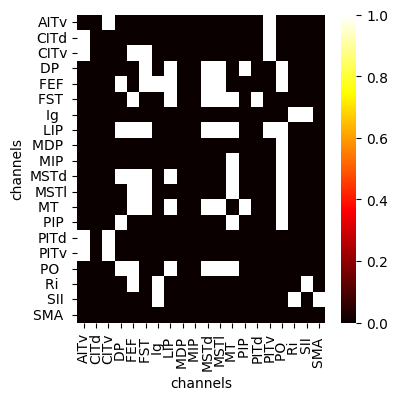

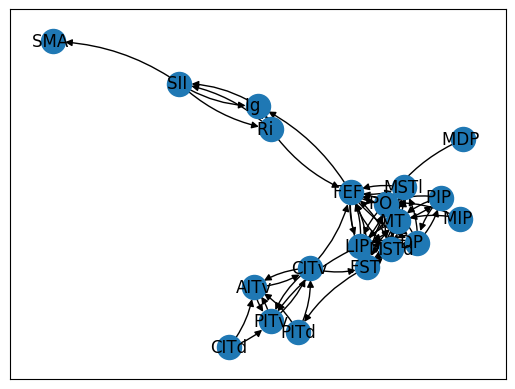

In [45]:
# Actividad.
# Filtar el dataframe para quedarse con las columnas 15 a 35 y las filas 15 a 35
filas_y_columnas= macaco_df.iloc[15:35, 15:35]
# Mostrar el mapa de calor
plt.figure(figsize=(4,4))
ax = sns.heatmap(filas_y_columnas.values,
                 annot=False, cmap='hot', fmt='.2f',
                 xticklabels=filas_y_columnas.columns,yticklabels=filas_y_columnas.index)
ax.set(xlabel='channels', ylabel='channels')
plt.show()
# Crear el grafo dirigido
G = nx.from_pandas_adjacency(macaco_df.iloc[15:35, 15:35], create_using=nx.DiGraph())

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.15')

# Calcular el grado del grafo
